In [1]:
import sys, os, json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime as dt

sys.path.append(os.getcwd() + '/..')
from _data.database import database

pd.set_option('mode.chained_assignment', None)

In [2]:
sec = json.load(open('../_data/data_specs.json'))

In [3]:
sel_sec = {x:sec[x] for x in sec if sec[x]['asset_class'] == 'Commodities'}

In [4]:
db = database(sel_sec, 'd').data

Retrieving data from Yahoo Finance...
[*********************100%***********************]  26 of 26 completed


In [6]:
sub_sectors = ['Metals', 'Soft', 'Energy', 'Meat', 'Grains']
sub_sectors_mapping = {s : [v['description'] for k, v in sel_sec.items() if v['sub_asset_class'] == s] for s in sub_sectors}

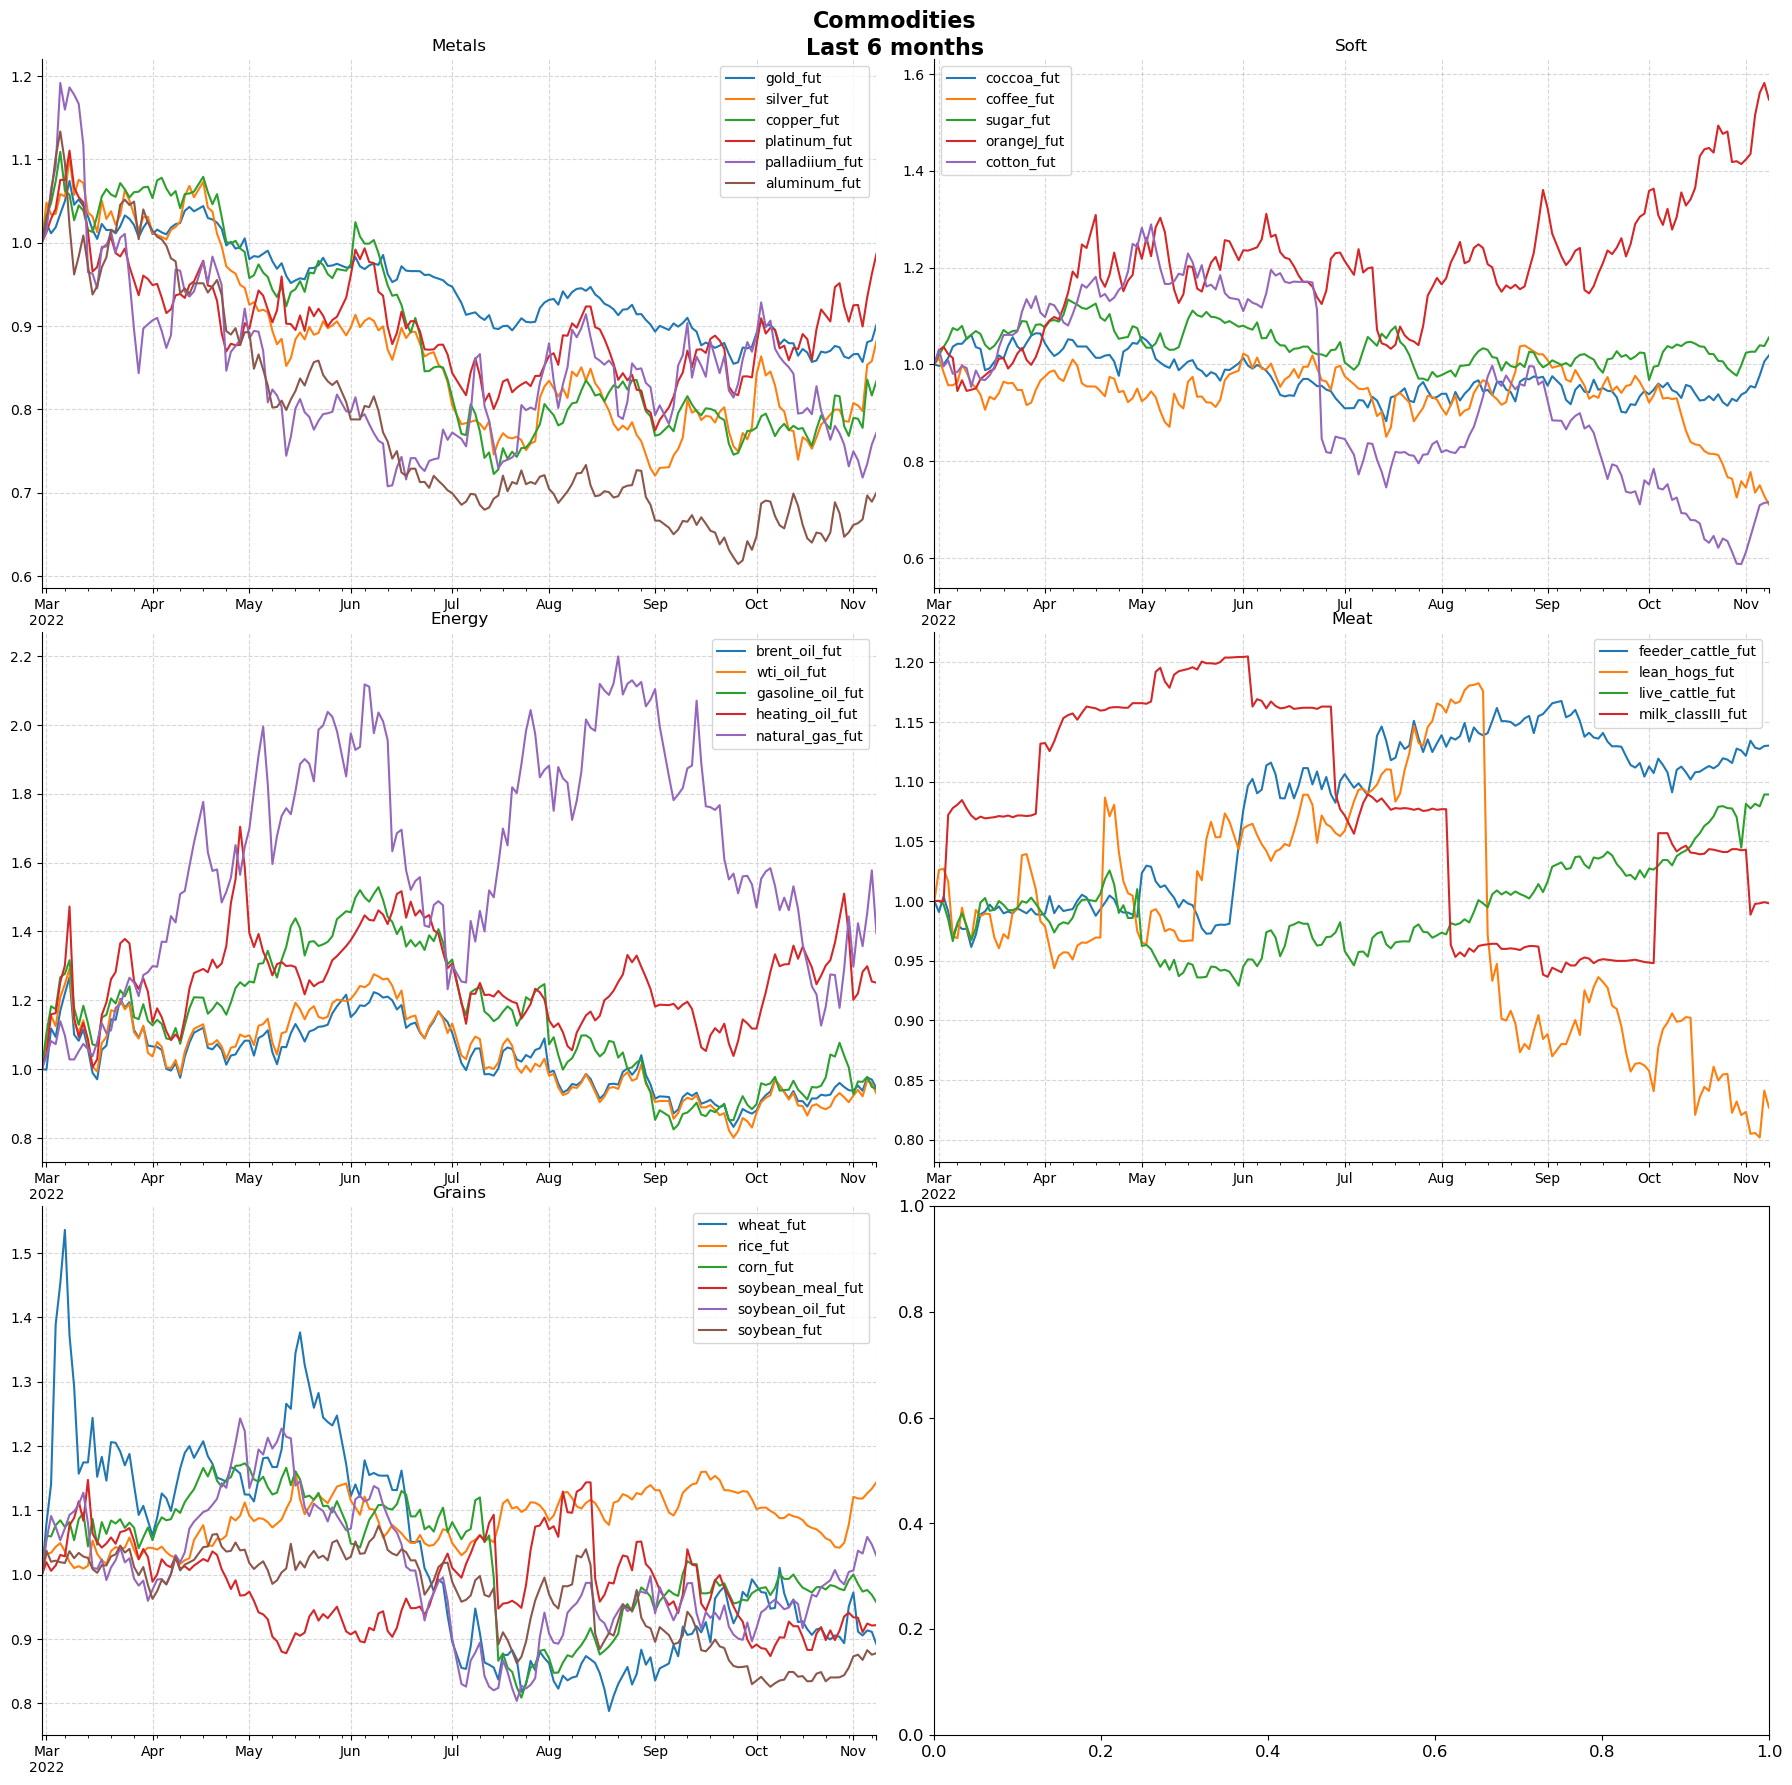

In [8]:
f, ax = plt.subplots(3, 2, figsize=(18,18))
f.suptitle('Commodities\nLast 6 months', fontsize = 16, fontweight = 'bold')
f.tight_layout()

for i, s in enumerate(sub_sectors) :
    _df = db[sub_sectors_mapping[s]].dropna().iloc[-182:]
    _df /= _df.iloc[0]
    _df.plot(ax = ax[int(i / 2), i % 2])
    ax[int(i / 2), i % 2].set_title(s)
    ax[int(i / 2), i % 2].spines[['right', 'top']].set_visible(False)
    ax[int(i / 2), i % 2].grid(alpha = 0.5, ls = '--')


void = plt.xticks(fontsize=12)
void = plt.yticks(fontsize=12)